In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score



In [2]:
df = pd.read_csv("data/merged_data_191.csv")

In [3]:
df.head()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
0,64,77,102,127,463,480,24,-14,77,1.451,0.244,1
1,61,102,168,101,405,409,69,75,71,1.157,0.234,1
2,70,87,123,80,400,434,78,76,63,1.672,0.519,1
3,84,105,162,102,361,429,65,36,51,1.683,0.945,0
4,71,116,155,93,404,439,25,8,64,0.851,0.930,1


In [4]:
X = df.drop("target" , axis=1)
y = df['target']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 ,random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-5.56015137e-02, -3.70623043e-01, -6.88737555e-01,
        -2.62252691e-01,  9.46140170e-01,  1.27106323e+00,
         6.98589809e-01, -9.55680296e-01, -6.74155537e-01,
        -5.27107934e-01, -9.05985272e-01],
       [-5.45539490e-01,  4.06125396e-01,  1.14968776e+00,
        -4.18575864e-01,  3.97234423e-01, -2.06813635e-01,
         3.41062365e-01,  3.15270321e-01,  3.26544088e-01,
        -2.00169675e-01, -6.47624676e-01],
       [ 5.56820956e-01, -3.88643177e+00, -3.70171238e+00,
         1.54609103e-01,  4.24679710e-01,  1.51737604e+00,
        -1.69684407e+00,  2.31929297e-01,  1.26404163e-01,
        -1.37841094e+00, -4.78353940e-01],
       [-2.07659567e+00,  1.63257030e+00,  1.22628882e+00,
         3.28107256e+00,  2.15373282e+00, -1.16127578e+00,
        -2.66734291e-01,  2.74148105e-03, -1.05442139e+00,
         2.06944520e+00, -1.64008572e+00],
       [-9.12992972e-01, -8.61201005e-01,  1.02806679e-01,
         5.71470896e-01,  2.01650638e+00,  1.08632862e+00,
  

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=19),
    "Random Forest": RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=500,
        max_depth=8,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt'
    ),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=500,
        learning_rate=0.05,
        random_state=42
    )
}

In [8]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Show results in a table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print(results_df)

d:\projects\HeartAttackDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:13:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.923077   0.941176  0.969697  0.955224
1              XGBoost  0.897436   0.914286  0.969697  0.941176
2    Gradient Boosting  0.897436   0.914286  0.969697  0.941176
3             AdaBoost  0.846154   0.846154  1.000000  0.916667
4  K-Nearest Neighbors  0.769231   0.852941  0.878788  0.865672
5  Logistic Regression  0.487179   0.842105  0.484848  0.615385


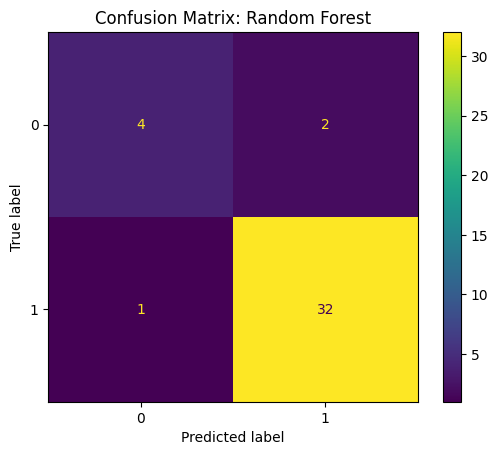

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = models[results_df.loc[0, "Model"]]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix: {results_df.loc[0, 'Model']}")
plt.show()

In [18]:
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

In [19]:
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_lambda": [1, 1.5, 2.0]
}

In [20]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,              
    scoring="f1",           
    cv=3,                   
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [21]:
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nTest Set Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best F1 Score: 0.921702800361337

Test Set Performance:
Accuracy : 0.8974358974358975
F1-score : 0.9411764705882353
Precision: 0.9142857142857143
Recall   : 0.9696969696969697


d:\projects\HeartAttackDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
